## 6.1 Update parameter

In [ ]:
import numpy as np

In [ ]:
class SGD:
  def __init__(self, lr=0.01):
    self.lr = lr

  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]


SGD 단점   
* anisotropy 함수(방향에 따라 성질이 다른 함수)에서는 탐색 경로가 비효율적이다   
  * 기울어진 방향이 본래의 최솟값과 다른 방향을 따를 때 문제가 되므로   
  무작정 기울기를 따라가는거보다 다른 방법을 쓴다 -> Momentum / Adagrad / Adam

### 6.1.4 Momentum
* lr과 momentum을 고정으로 두고 학습한다.
* momentum을 도입한 것은 이전 진행방향을 기억하고 그 영향력을 행사하기 위한 term

In [ ]:
class Momentum:
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None

  def update(self, params, grad):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)

    for key in params.keys():
      self.v[key] = self.momentum * self.v[key] - self.lr*self.grads[key]
      params[key] += self.v[key]


Momentum 단점
* 여전히 가파른 경사의 속도가 안정적이지 않다


### 6.1.5 Adagrad
* learning rate는 적정크기여야한다 -> *learning rate decay* 사용!
  * 매개변수 전체의 lr을 일괄적으로 낮추는 것은 간단하나 not so good
  * 각 매개변수에 맞춤형으로! -> Adagrad

* 매개변수의 원소 중에서 많이 움직인 원소는 h가 커지므로 학습률이 다른 것에 비해 낮아진다
* 문제는 학습을 많이 진행할 수록 lr이 0된다 -> RMSProp은 과거의 모든 기울기를 균일하게 더하지 않고 먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 크게 반영한다(exponential moving average)

In [ ]:
class Adagrad:
  def __init__(self, lr=0.01):
    self.lr = lr
    self.h = None

  def update(self, params, grad):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val)

    for key in params.keys():
      self.h[key] += grad[key] * grad[key]
      params[key] -= self.lr * grad[key] / np.sqrt(self.h[key] + 1e-7)

### 6.1.6 Adam
* Momentum + AdaGrad + hype_para 편향보정 = Adam
* three hype_para
  * 지금까지의 학습률 $\alpha$
  * coeff of first order momentum, $\beta_1(=0.9)$
  * coeff of second order momentum $\beta_2(=0.999)$

In [ ]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None

    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)

        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])

            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

* optimizer마다 갱신 경로가 다르다. 따라서 풀어야할 문제가 무엇이느냐에 따라 좋은 optimizer가 다르므로 주의   
  (모든 문제에서 항상 뛰어난 기법은 아직 없다)
  (지금도 많은 연구에서 SGD와 Adam을 사용한다)

## 6.2 가중치의 초깃값
* 가중치가 균일하게 적용되면 결국 hidden layer node의 값들이 전부 같으므로 1개 node hidden layer와 같은 의미다 -> 0으로 전부 초기화하면 안돼!
* 0과 1에 가까운 초기값들은 sigmoid에서 gradient vanishing - 층을 깊게할수록 문제
* 그렇다고 random 생성의 표준편차를 줄이면 너무 비슷한 값들만 생성되어 node를 여러개 만드는 의미가 없어짐 - 표현력 제한


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np. random.rand(1000, 100)
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5
activations ={}

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]
  # w = np. random. randn(node_num, node_num)* 1
  w = np. random. randn(node_num, node_num)* 0.01
  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i]= z

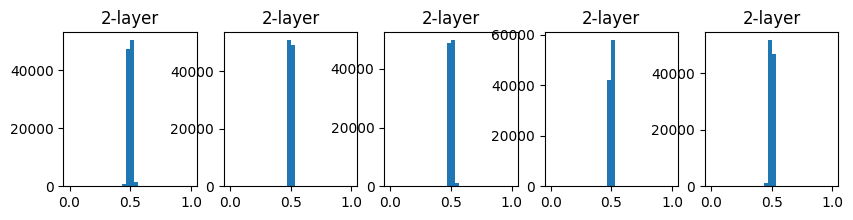

In [ ]:
plt.figure(figsize=(10, 2))
for i, a in activations. items():
  plt. subplot(1, len(activations), i+1)
  plt. title(str(1+1) + "-layer")
  plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### Xavier initialization
* for sigmoid (0부근에서 linear)
* 앞 층의 노드 갯수가 n개 -> 표준편차를 $\frac{1}{\sqrt{n}}$으로 분포 생성
* 활성화 함수용으로는 원점 대칭인 함수가 좋다고 알려져 있다

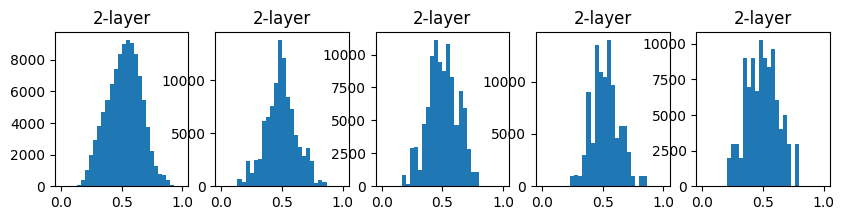

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np. random.rand(1000, 100)
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5
activations ={}

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]
  # w = np. random. randn(node_num, node_num)* 1
  # w = np. random. randn(node_num, node_num)* 0.01
  w= np.random.randn(node_num, node_num) / np.sqrt(node_num)
  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i]= z

plt.figure(figsize=(10, 2))
for i, a in activations. items():
  plt. subplot(1, len(activations), i+1)
  plt. title(str(1+1) + "-layer")
  plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### He initialization
* for ReLU (0부근에서 non-linear)
* ReLU를 activation fct로 쓰면 0부근에서 선형이 아니기 때문에 Xavier not good
* 앞 층 노드 n개 -> 표준편차 $\sqrt{\frac{2}{n}}$ 정규분포
* 음의 영역이 0이라서 더 넓게 분포시키기 위해 분산을 두배로


## 6.3 Batch normalization
* 가중치의 초깃값을 적절히 설정 -> 각 층의 활성화값 분포가 적당히 퍼짐 -> 학습이 원활하게 수행됨
* 초기값만 손보지말고 각층의 분포가 고르도록 더 강제! : Batch normalization

배치 정규화의 장점
1. 학습 속도 개선
2. 낮은 초기화 의존도
3. 오버피팅 억제 -> 드롭아웃 등 필요성 down!

따라서 각 층에서의 활성화 값이 미니배치 전체를 통틀어 적당히 분포되도록 만들어야 한다   
* Affine - BatchNorm - ReLU -    
*
$$\mu_B \leftarrow \frac{1}{m} \sum_{i=1}^{m} x_i$$
$$\sigma_B^2 \leftarrow \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu_B)^2$$
$$\hat{x}_i \leftarrow \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}$$
* $\epsilon$은 10e-7정도로 작은 값으로, 분모가 0이 되는 걸 방지한다
* 이후 $\gamma$ scale(확대)변환과 $\beta$ shift변환을 수행한다
$$y_i \leftarrow \gamma \hat{x}_i + \beta$$
  처음에는 $\gamma = 1$, $\beta = 0$으로 시작하지만 학습하면서 최적화
  


## 6.4 바른 학습을 위해
### 오버피팅
* weight decay: 원래 오버피팅은 weight parameter가 클 때 발생하는 경우가 많아서
* dropout: train 때는 데이터를 넣을 때마다 무작위로 뉴런을 삭제하고, test 때는 모든 뉴런에 신호를 전달한다
  * 단, test 때 각 뉴런에 훈련 때 삭제 안한 비율을 곱하여 출력한다


In [2]:
def loss(self, x, t):
    """손실 함수를 구한다.

    Parameters
    ----------
    x : 입력 데이터
    t : 정답 레이블

    Returns
    -------
    손실 함수의 값
    """
    y = self.predict(x)

    weight_decay = 0
    for idx in range(1, self.hidden_layer_num + 2):
        W = self.params['W' + str(idx)]
        weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)

    return self.last_layer.forward(y, t) + weight_decay

class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

## 6.5 적절한 하이퍼파라미터 값 찾기
* 훈련 데이터 : 매개변수 학습
* 검증 데이터 : 하이퍼파라미터 성능 평가
* 시험 데이터 : 신경망의 범용 성능 평가
   
* 핵심은 하이퍼파라미터의 '최적 값'이 존재하는 범위를 조금씩 줄여간다는 것
* 신경망의 하이퍼파라미터 최적화에서는 그리드 서치 같은 규칙적인 탐색보다는 무작위로
샘플링해 탐색하는 편이 좋은 결과를 낸다고 알려져 있다   
  (최종 정확도에 미치는 영향력이 하이퍼파라미터마다 다르기 때문)
* 하이퍼파라미터의 값은 대략적으로 지정하는 것이 효과적 - 10e-3부터 10e+3까지 선택하는게 보통인데 이게 10의 거듭제곱 단위로 범위를 지정해서 log scale로 지정한다고 한다

* hyperparameter optmz할 때는 epoch을 작게하는 것이 좋다. 그래야 결과가 안좋을 거 같을 때 빠르게 중단 가능하기 때문이다   

---


0. 하이퍼파라미터 값의 범위를 설정합니다.

1. 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출합니다.

2. 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가합니다(단, 에폭은 작게 설정합니다).

3. 1단계와 2단계를 특정 횟수(100회 등) 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힙니다.





